<font color = "purple" size="13"><b>Decision Trees. With flowers...</b></font>

In [105]:
#import sys; !{sys.executable} -m pip install sklearn pandas numpy matplotlib seaborn statsmodels opendatasets
import numpy as np; import matplotlib.pyplot as plt; from sklearn.datasets import load_iris; from sklearn.tree import DecisionTreeClassifier; from mpl_toolkits.mplot3d import Axes3D
iris = load_iris()
X = data = iris.data
y = answer = iris.target

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" />


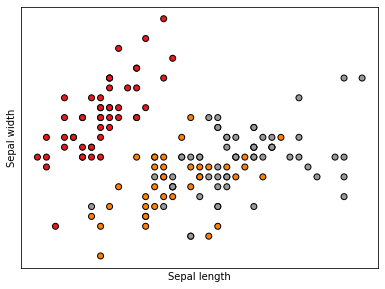

In [96]:
plt.xlabel('Sepal length'); plt.ylabel('Sepal width'); plt.xticks(()); plt.yticks(())
plt.scatter(data[:, 0], data[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
#plt.scatter(data[:, 2], data[:, 3], c=y, cmap=plt.cm.Set1, edgecolor='k')

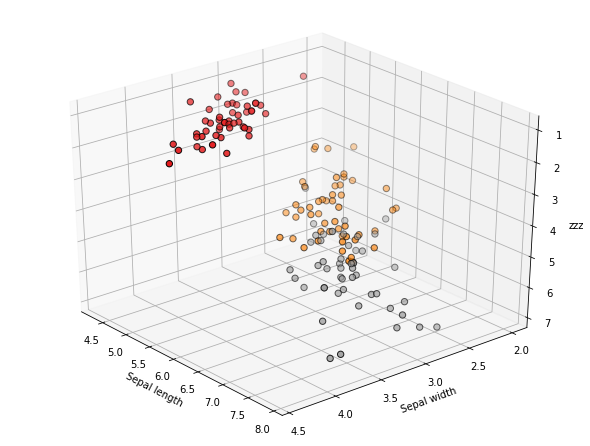

In [129]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=220); ax.set_xlabel('Sepal length'); ax.set_ylabel('Sepal width'); ax.set_zlabel('zzz'); 
#ax.set_xticks([],[]);ax.set_yticks([],[]);ax.set_zticks([],[])
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = DecisionTreeClassifier().fit(X_train, y_train)
clf.score(X_test, y_test, sample_weight=None)

0.9736842105263158

In [154]:
from sklearn.tree import export_text
r = export_text(clf, feature_names=iris['feature_names'])
print(r)

|--- petal length (cm) <= 2.35
|   |--- class: 0
|--- petal length (cm) >  2.35
|   |--- petal length (cm) <= 4.95
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |--- petal length (cm) >  4.95
|   |   |--- petal length (cm) <= 5.05
|   |   |   |--- sepal width (cm) <= 2.75
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  2.75
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  5.05
|   |   |   |--- class: 2



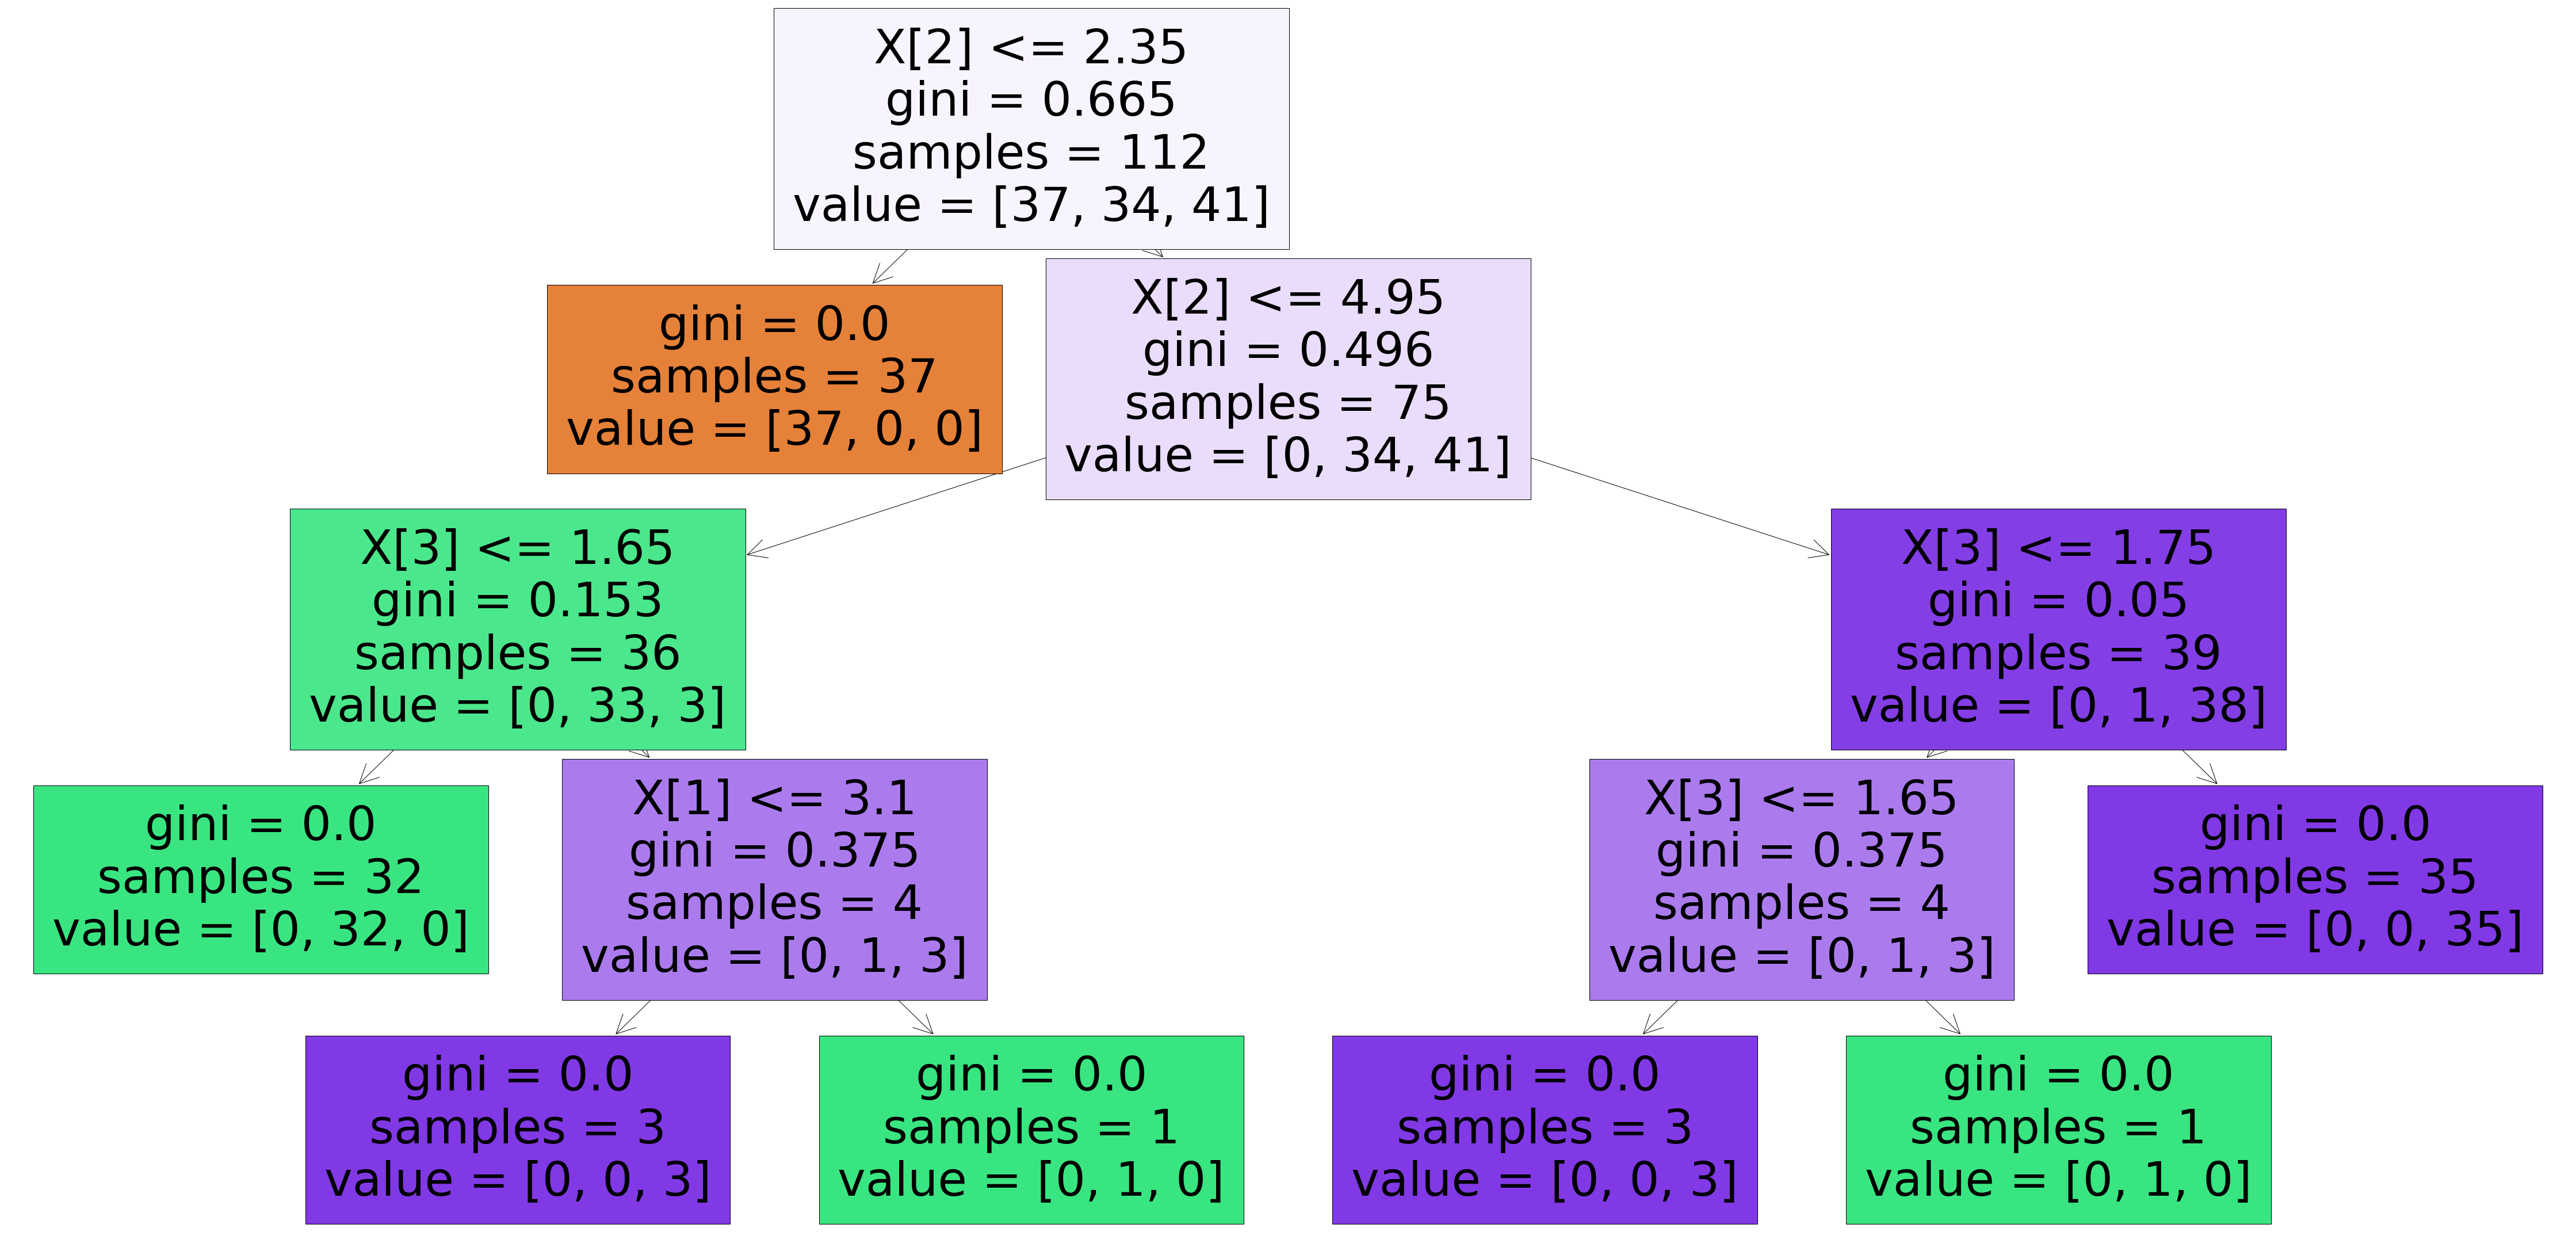

In [160]:
plot_tree(clf, filled=True)
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

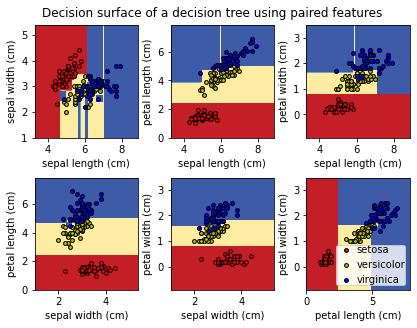

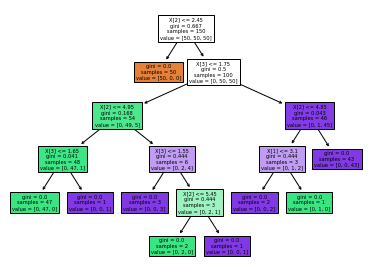

In [98]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

#plt.rcParams["figure.figsize"] = (20,20) #
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.figure()

clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

In [41]:
iris.data[3:6,...]

array([[4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [43]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [87]:
iris.data.shape
X.shape

(150, 4)

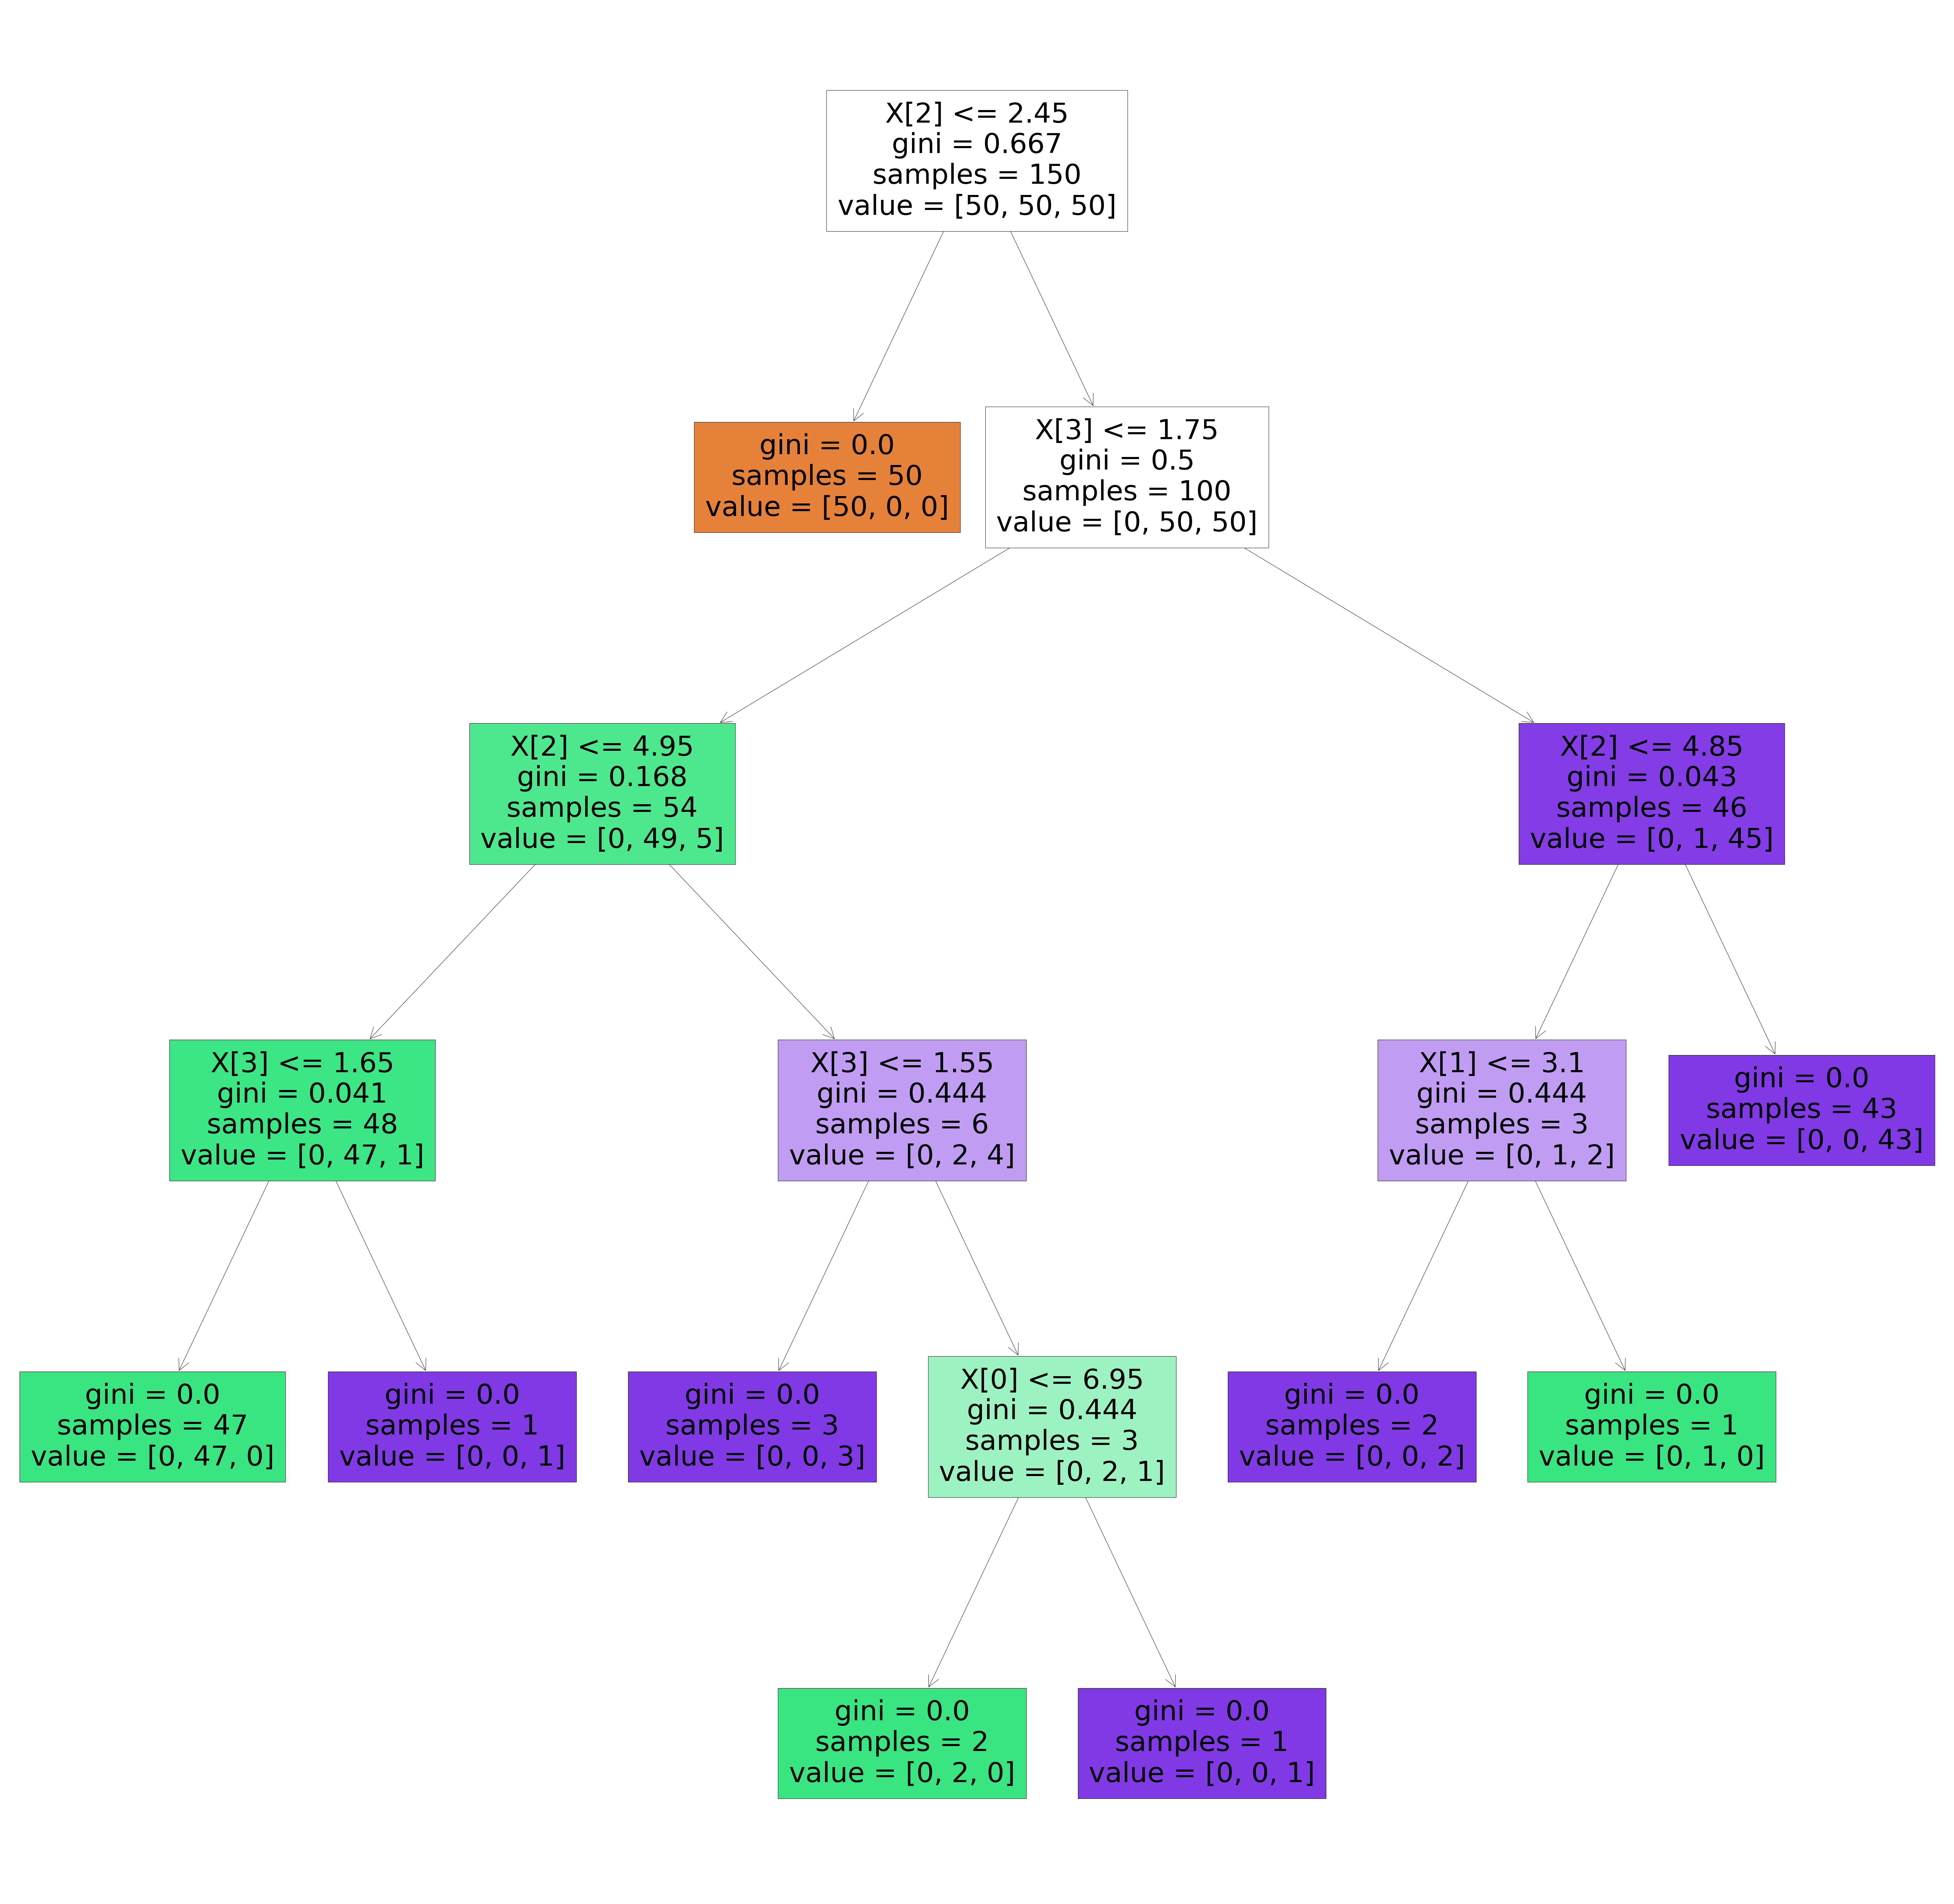